In [14]:
import cv2 as cv
import numpy as np
from IPython.display import display
from PIL import Image
img = cv.imread('koin.jpg')

## Preprocessing

In [15]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_blur = cv.GaussianBlur(img_gray, (7, 7), 1.5)
edges = cv.Canny(img_blur, 50, 250)
# cv.imshow("gambar grayscale", img_gray)
# cv.imshow("gambar blur dengan gaussian", img_blur)
# cv.imshow("deteksi tepi dengan canny", edges)

In [16]:
rupiah = {
    "100": {
        "nilai": 100,
        "radius": 23,
        "rasio": 1,
        "jumlah": 0,
    },
    "200": {
        "nilai": 200,
        "radius": 25,
        "rasio": 1.086,
        "jumlah": 0,
    },
    "500": {
        "nilai": 500,
        "radius": 27,
        "rasio": 1.174,
        "jumlah": 0,
    },
    "1000": {
        "nilai": 1000,
        "radius": 24.15,
        "rasio": 1.05,
        "jumlah": 0,
    },
}

radius = []
xy = []
toleransi_rasio = 0.035
total = 0

## Deteksi Lingkaran dengan Hough Circle Transform

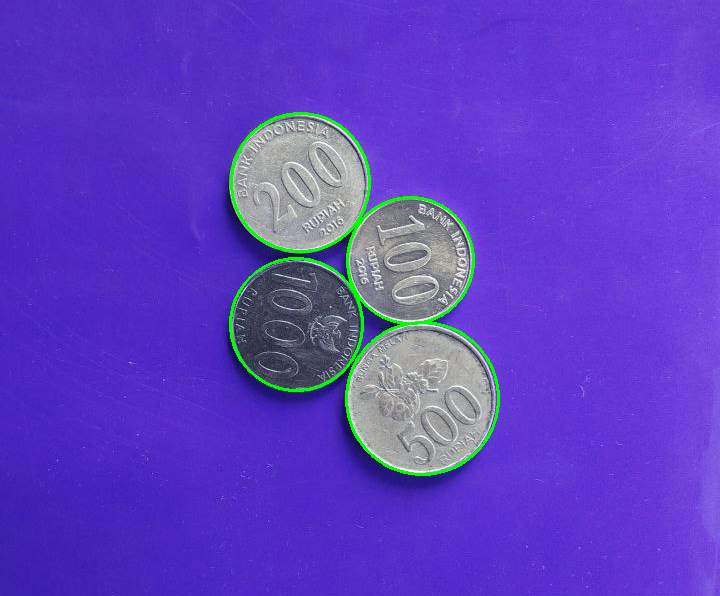

In [17]:
circles = cv.HoughCircles(edges, cv.HOUGH_GRADIENT, 1, 100,
                          param1=50, param2=25, minRadius=50, maxRadius=90)

img_copy = img.copy()

# circles = [xc,yc,r]
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0]:
        x,y,r = i
        deteksi_koin = cv.circle(img_copy, (x,y), r, (0, 255, 0), 2)
        
        radius.append(r)
        xy.append([x,y])

# cv.imshow("Hasil Deteksi Lingkaran", deteksi_koin)

# cv.waitKey(0)
# cv.destroyAllWindows()
display(Image.fromarray(deteksi_koin))

## Deteksi Nilai Koin

Uang koin 100 berjumlah 1
Uang koin 200 berjumlah 1
Uang koin 500 berjumlah 1
Uang koin 1000 berjumlah 1


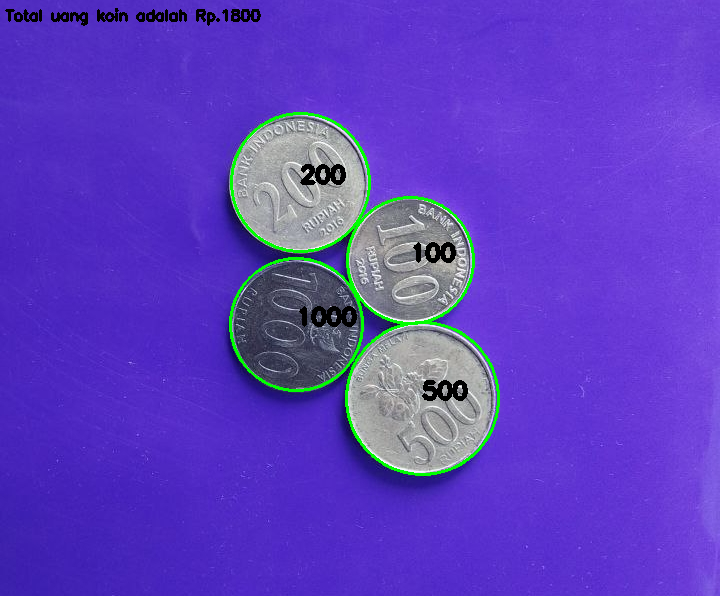

In [18]:
for j in circles[0]:
    x,y,r = j
    cek_rasio = r/min(radius)    
    for koin in rupiah:
        nilai = rupiah[koin]['nilai']
        if abs(cek_rasio - rupiah[koin]['rasio']) <= toleransi_rasio:
            rupiah[koin]['jumlah'] += 1
            total += rupiah[koin]['nilai']
            cv.putText(deteksi_koin, str(nilai), (x,y), 
                       cv.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 0), 3)
            

cv.putText(deteksi_koin, f"Total uang koin adalah Rp.{total}",
               (5,20),  cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
for koin in rupiah:
    banyak_koin = rupiah[koin]['jumlah']
    print(f"Uang koin {koin} berjumlah {banyak_koin}")

cv.imwrite("hasil deteksi koin.jpg", deteksi_koin)
# cv.imshow("Total Nilai Koin",deteksi_koin)

# cv.waitKey(0)
# cv.destroyAllWindows()
display(Image.fromarray(deteksi_koin))